In [1]:
import pandas as pd

# Load the dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [2]:
# Display the first few rows of the dataset to understand its structure
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking for missing values in the dataset
missing_values = titanic_data.isnull().sum()
missing_values_percentage = (missing_values / len(titanic_data)) * 100

missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_values_summary.sort_values(by='Missing Values', ascending=False)

,Missing Values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Imputing missing values
# For Age, use median to impute
age_imputer = SimpleImputer(strategy='median')
titanic_data['Age'] = age_imputer.fit_transform(titanic_data[['Age']])

In [7]:
# Dropping the Cabin column due to a high percentage of missing values
titanic_data.drop('Cabin', axis=1, inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Dropping columns that are not useful for prediction
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Check the processed dataset
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting the dataset into training and testing sets
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selecting and training the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Making predictions on the test set
y_pred = random_forest_model.predict(X_test)

In [11]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [12]:
accuracy, report

(0.8212290502793296,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.88      0.85       105\n           1       0.81      0.74      0.77        74\n\n    accuracy                           0.82       179\n   macro avg       0.82      0.81      0.81       179\nweighted avg       0.82      0.82      0.82       179\n')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

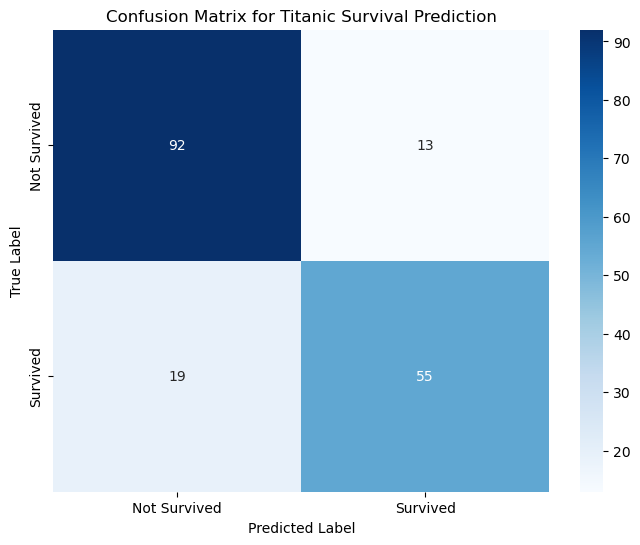

In [14]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [15]:
accuracy, report

(0.8212290502793296,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.88      0.85       105\n           1       0.81      0.74      0.77        74\n\n    accuracy                           0.82       179\n   macro avg       0.82      0.81      0.81       179\nweighted avg       0.82      0.82      0.82       179\n')

In [16]:
# Generating a classification report in a visual format

from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score

In [17]:
# Extracting precision, recall, and f1-score
precision, recall, fscore, _ = score(y_test, y_pred, average=None, labels=[0, 1])

In [18]:
# Creating a dataframe for the report
df_report = pd.DataFrame(list(zip(precision, recall, fscore)), 
                         index=['Not Survived', 'Survived'], 
                         columns=['Precision', 'Recall', 'F1-Score'])

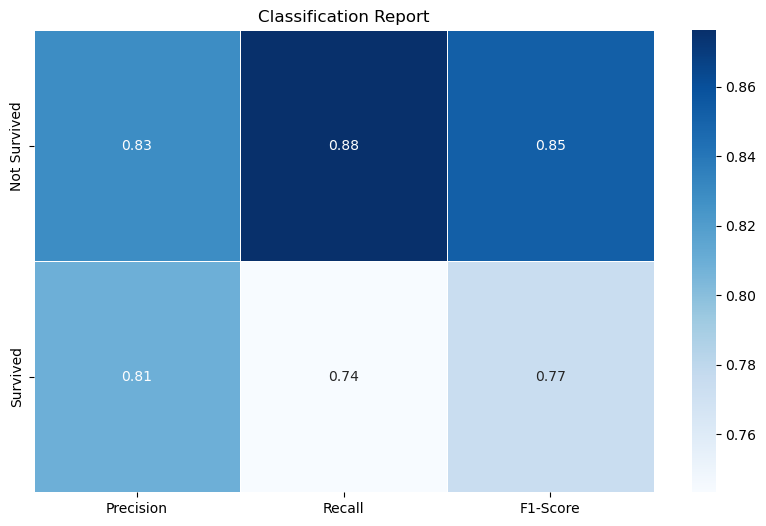

In [20]:
# Plotting the dataframe
plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)
plt.title('Classification Report')
plt.show()